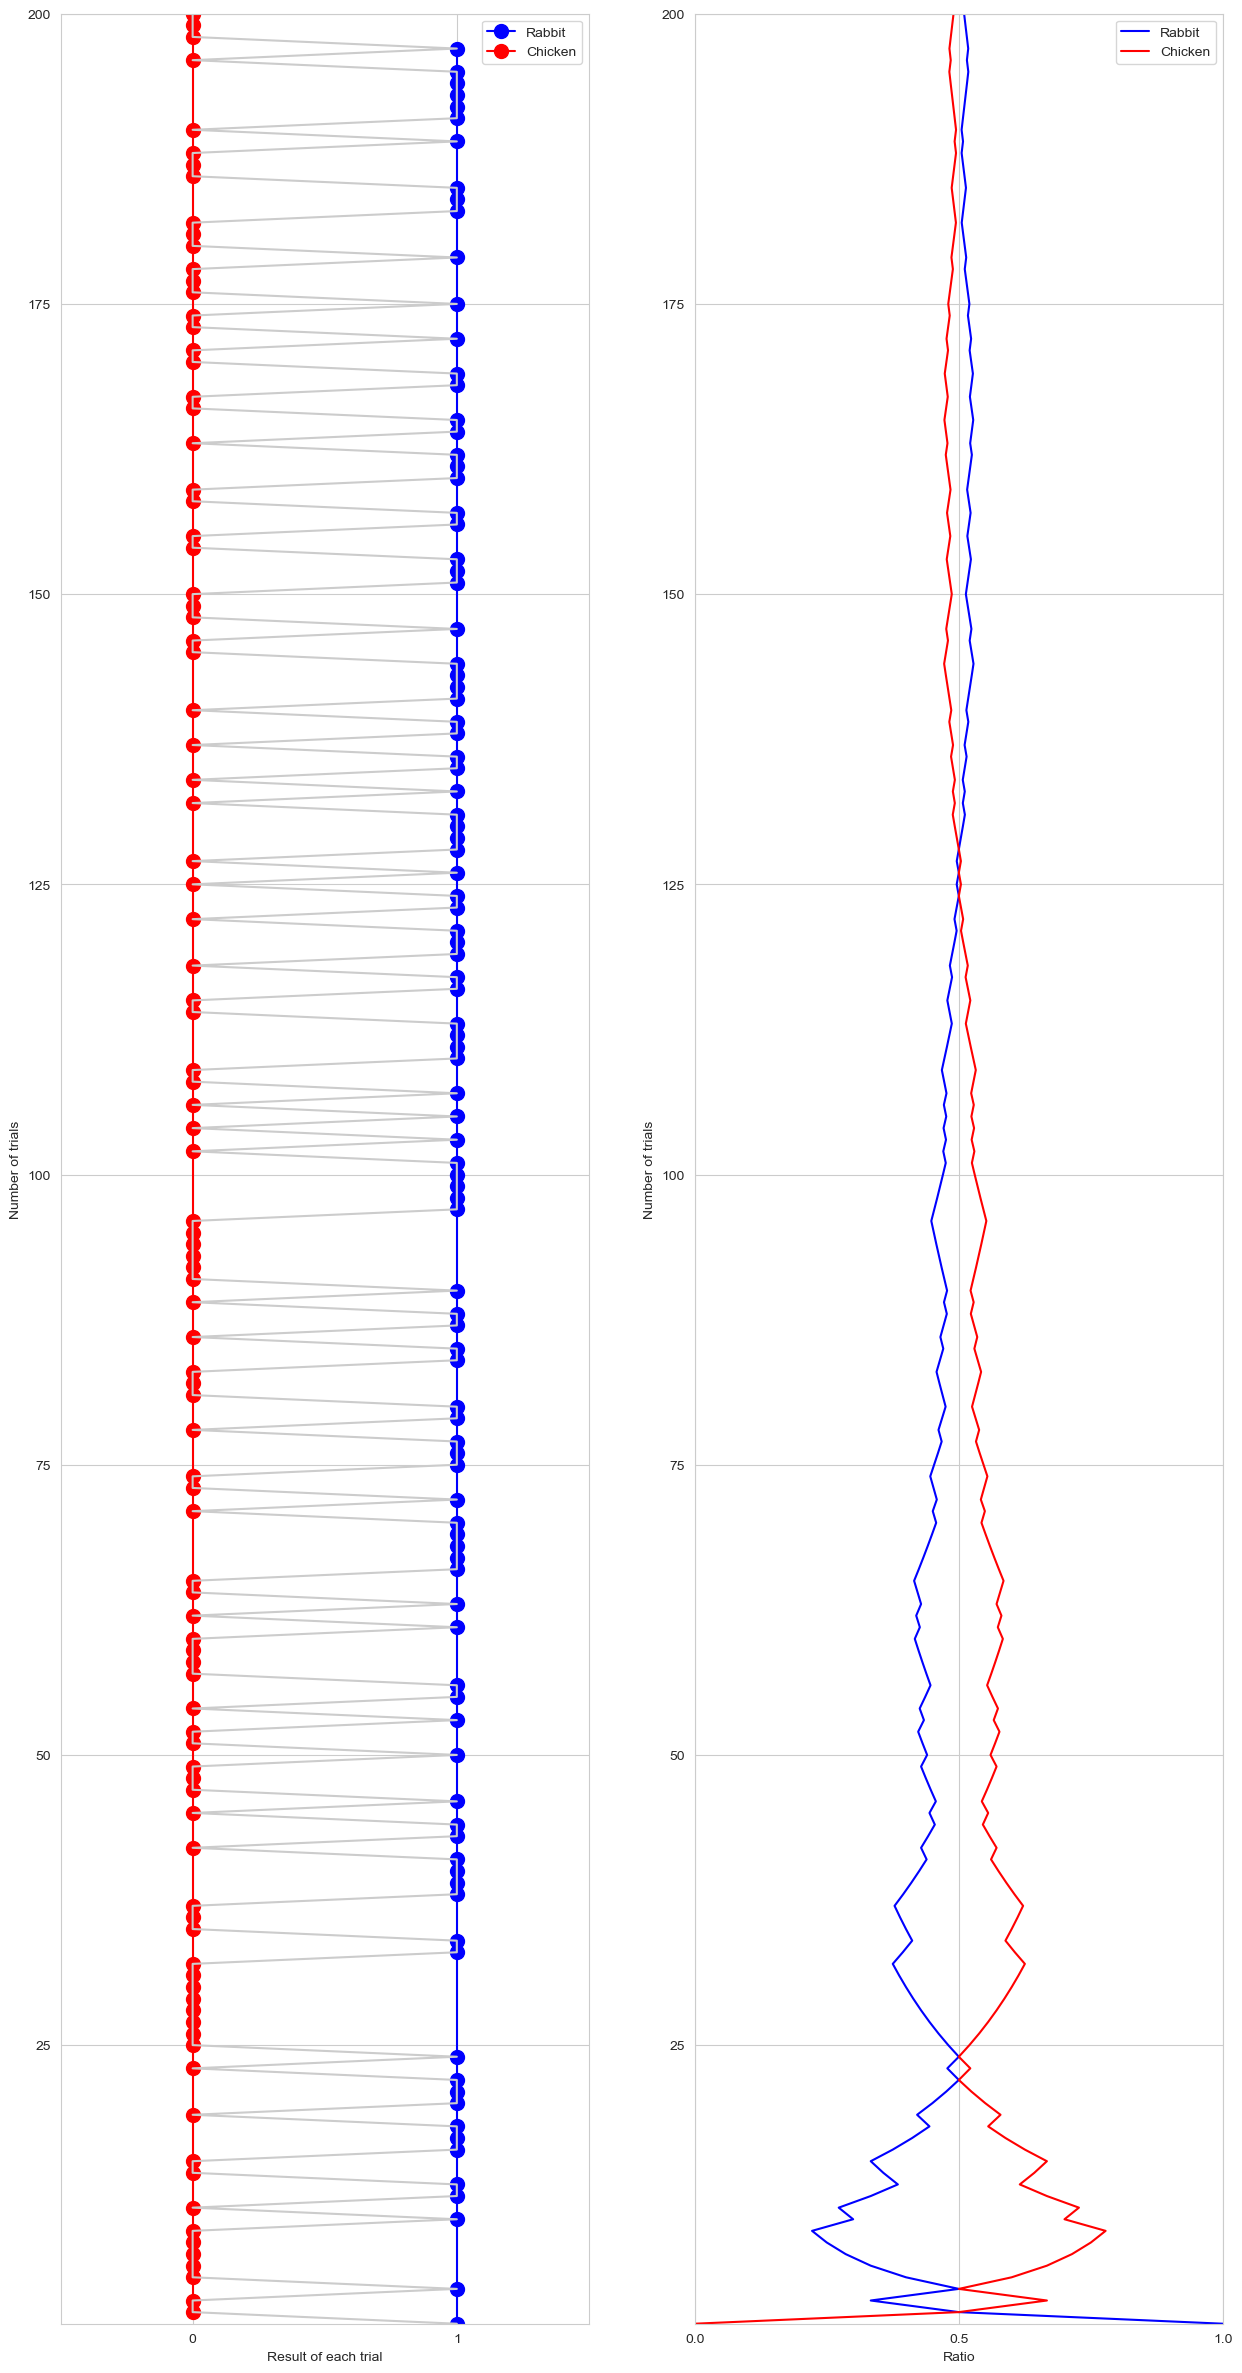

In [3]:
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats

# Beta 分布
beta_dist = stats.beta

# 自由度
alpha = 1  # degree of belief # 1, 2, 16

# 真实百分比（成功率）
true_percentage = 0.45  # 0.3
# 生成伯努利分布的观测数据
Data_all_trials = stats.bernoulli.rvs(true_percentage, size=200)
# stats.bernoulli.rvs 是 SciPy 中用于生成伯努利分布随机变量的函数, size指定要生成的随机变量数量

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))

trials_array = np.arange(0, 200) + 1
# 掩码
mask = (Data_all_trials == 1)

axs[0].plot(Data_all_trials[mask], trials_array[mask],
            color='b', linestyle=None,
            marker='.', markersize=20,
            label='Rabbit')

axs[0].plot(Data_all_trials[~mask], trials_array[~mask],
            color='r', linestyle=None,
            marker='.', markersize=20,
            label='Chicken')

axs[0].plot(Data_all_trials, trials_array,
            color=[0.8, 0.8, 0.8])

axs[0].set_ylim(1, 200)
axs[0].set_xlim(-0.5, 1.5)
axs[0].set_xticks([0, 1])

axs[0].set_ylabel("Number of trials", rotation=90)
# axs[0].yaxis.tick_right()
# axs[0].yaxis.set_label_position("right")
axs[0].set_xlabel("Result of each trial")
# axs[0].invert_xaxis()
axs[0].legend()

# plt.setp(axs[0].get_xticklabels(), rotation=90, va="top", ha="center")
# plt.setp(axs[0].get_yticklabels(), rotation=90, va="center", ha="left")

# 计算比例
ratio_rabbits = np.cumsum(Data_all_trials) / trials_array
ratio_chickens = 1 - ratio_rabbits

axs[1].plot(ratio_rabbits, trials_array,
            color='b', label='Rabbit')

axs[1].plot(ratio_chickens, trials_array,
            color='r', label='Chicken')

axs[1].set_ylim(1, 200)
axs[1].set_xlim(0, 1)
axs[1].set_xticks([0, 0.5, 1])

axs[1].set_ylabel("Number of trials", rotation=90)
# axs[1].yaxis.tick_right()
# axs[1].yaxis.set_label_position("right")
axs[1].set_xlabel("Ratio")
# axs[1].invert_xaxis()
axs[1].legend()

# plt.setp(axs[1].get_xticklabels(), rotation=90, va="top", ha="center")
# plt.setp(axs[1].get_yticklabels(), rotation=90, va="center", ha="left")


# ridgeline style


Text(0, 0.5, 'Number of trials')

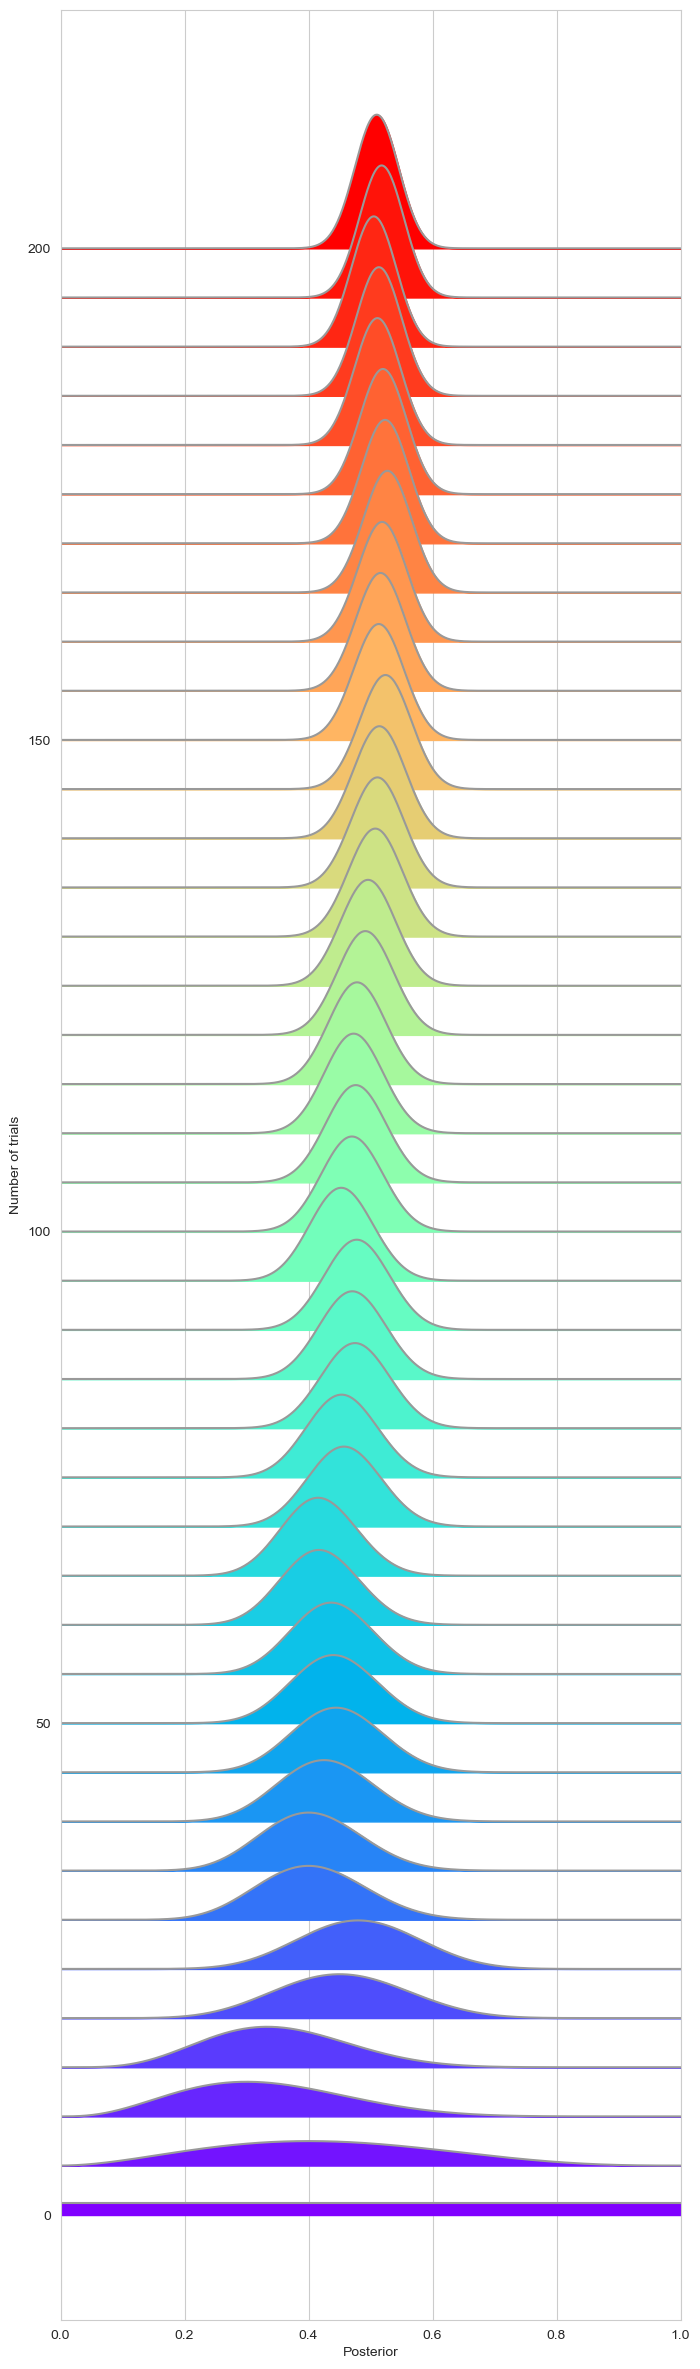

In [5]:
from matplotlib.pyplot import cm

theta_array = np.linspace(0, 1, 500)

num_animals_array = np.arange(0, 200 + 5, 5)
# 颠倒顺序
num_animals_array = num_animals_array[::-1]
# reverse the sequence of layers

colors = cm.rainbow_r(np.linspace(0, 1, len(num_animals_array)))

fig, ax = plt.subplots(figsize=(8, 30))

for idx, num_animals_idx in enumerate(num_animals_array):
    
    # 设置当前层的高度
    height = num_animals_idx
    # random data generator
    # 设置当前层的数据
    data_idx = Data_all_trials[0:num_animals_idx]
    # actual percentage of rabbits is 30%

    num_rabbits_idx = data_idx.sum()  # s
    # 计算概率密度函数
    posterior_pdf = beta_dist.pdf(theta_array,
                                  num_rabbits_idx + alpha,  # s + alpha
                                  num_animals_idx - num_rabbits_idx + alpha)  # n - s + alpha

    ratio = 1.2
    # 绘制后延分布
    ax.plot(theta_array,
            posterior_pdf * ratio + height,
            color=[0.6, 0.6, 0.6])

    ax.fill_between(theta_array, height,
                    posterior_pdf * ratio + height,
                    color=colors[idx])

ax.set_xlim(0, 1)
ax.set_xlabel('Posterior')
ax.set_ylabel('Number of trials')


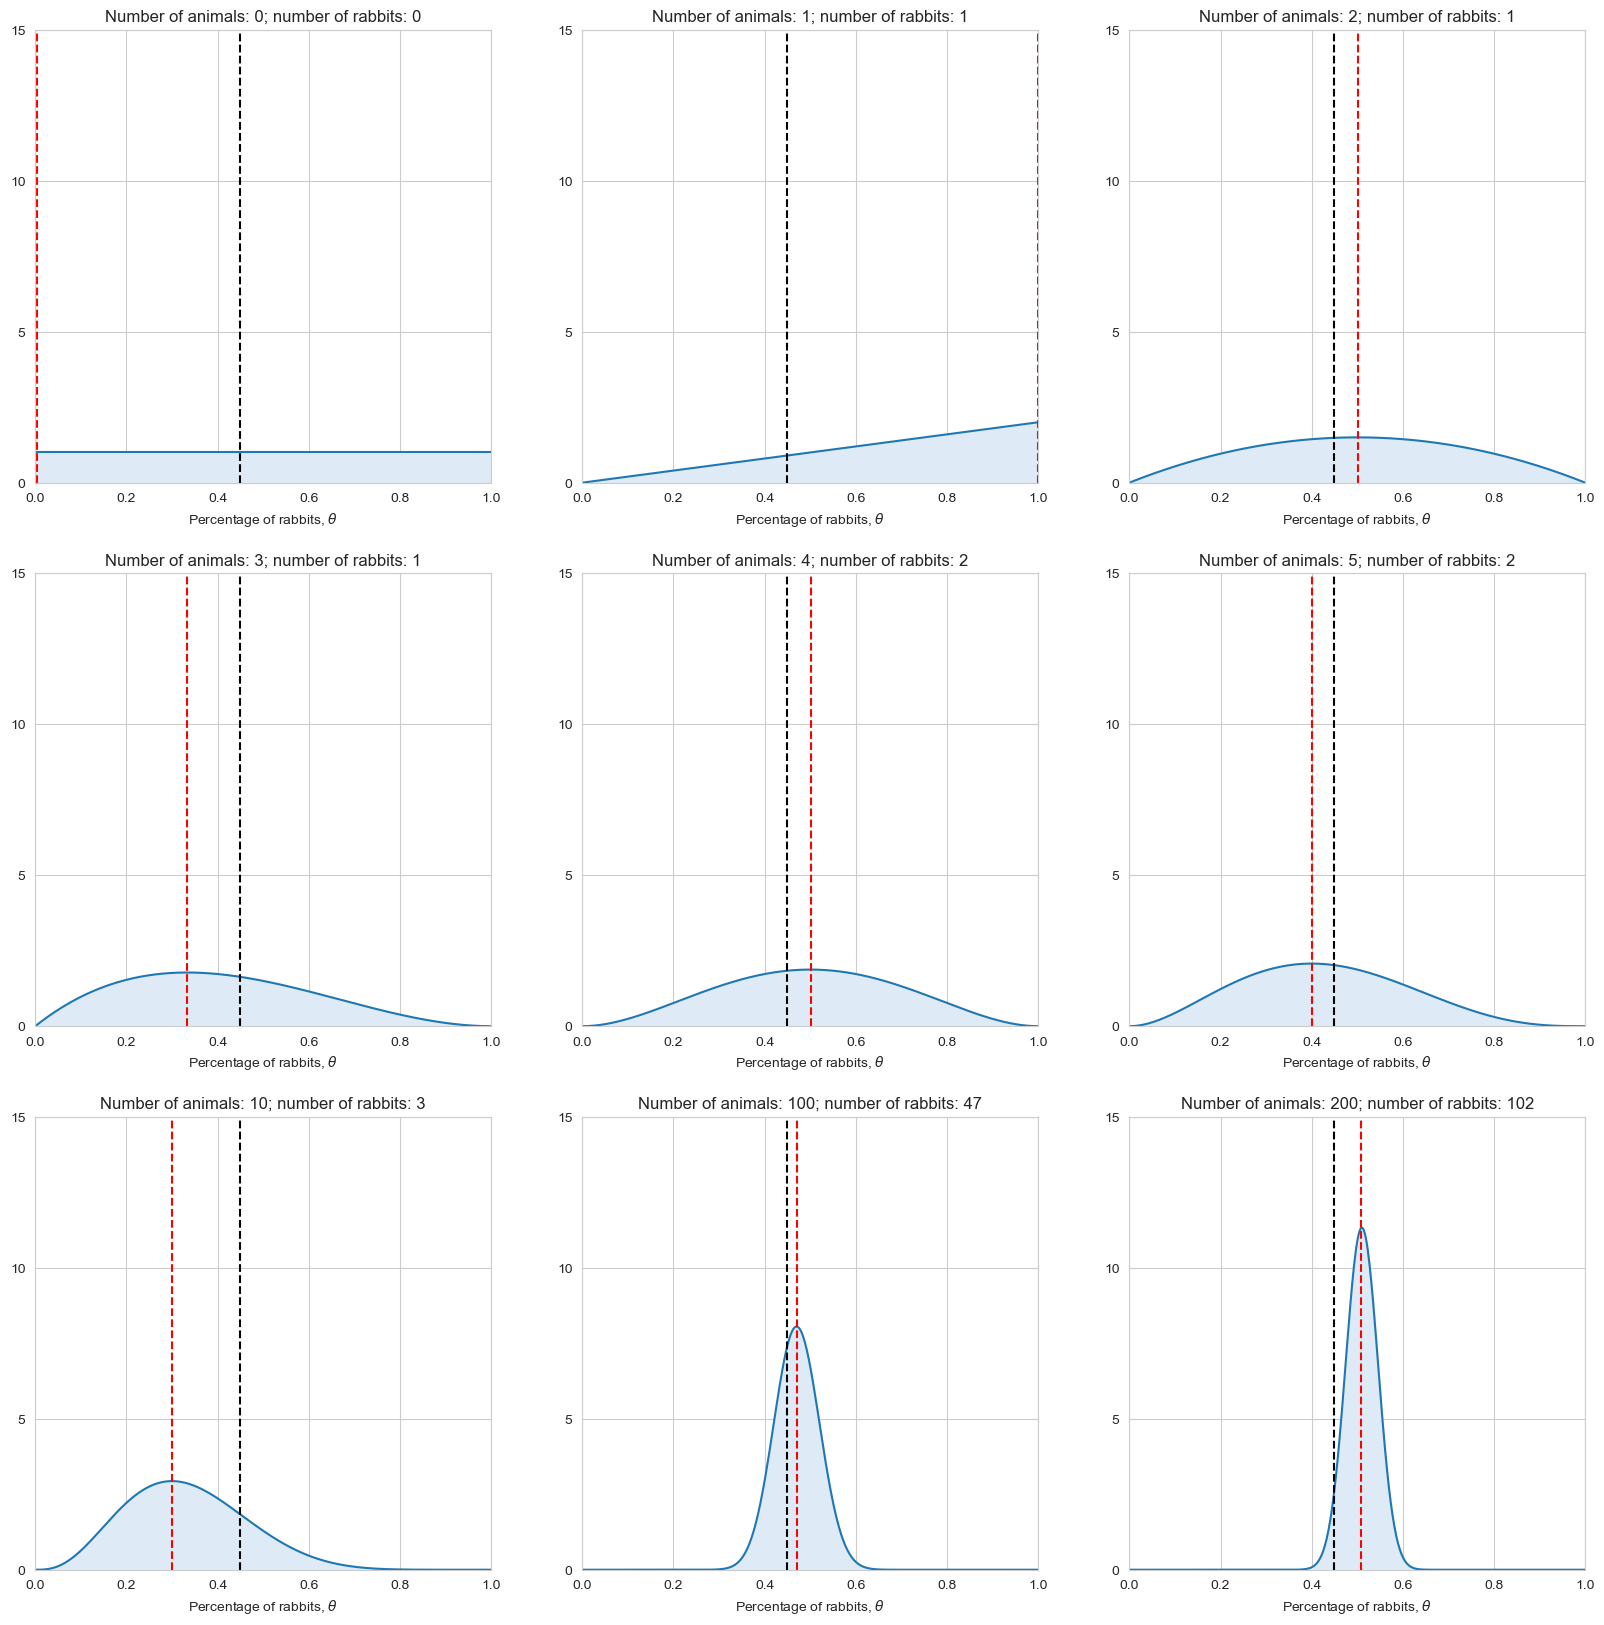

In [6]:
# locations of snapshots

# 动物数量
num_animals_array = [0, 1, 2, 3, 4, 5, 10, 100, 200]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for ax_idx, num_animals_idx in zip(axs.ravel(), num_animals_array):
    
    # random data generator
    # 当前循环数据
    data_idx = Data_all_trials[0:num_animals_idx]
    # actual percentage of rabbits is 30%

    num_rabbits_idx = data_idx.sum()  # s
    # 后验概率
    # 计算概率密度函数
    posterior_pdf = beta_dist.pdf(theta_array,
                                  num_rabbits_idx + alpha,  # s + alpha
                                  num_animals_idx - num_rabbits_idx + alpha)  # n - s + alpha
    
    loc_max = theta_array[np.argmax(posterior_pdf)]
    # location of MAP

    ax_idx.plot(theta_array, posterior_pdf)
    
    ax_idx.axvline(x=loc_max, color='r', linestyle='--')
    ax_idx.set_title("Number of animals: %d; number of rabbits: %d"
                     % (num_animals_idx, num_rabbits_idx))

    ax_idx.set_xlabel('Percentage of rabbits, $\u03B8$')
    ax_idx.fill_between(theta_array, 0, posterior_pdf, color="#DEEAF6")
    ax_idx.axvline(x=true_percentage, color='k', linestyle='--')
    ax_idx.set_xlim(0, 1)
    ax_idx.set_yticks([0, 5, 10, 15])
    ax_idx.set_ylim(0, 15)


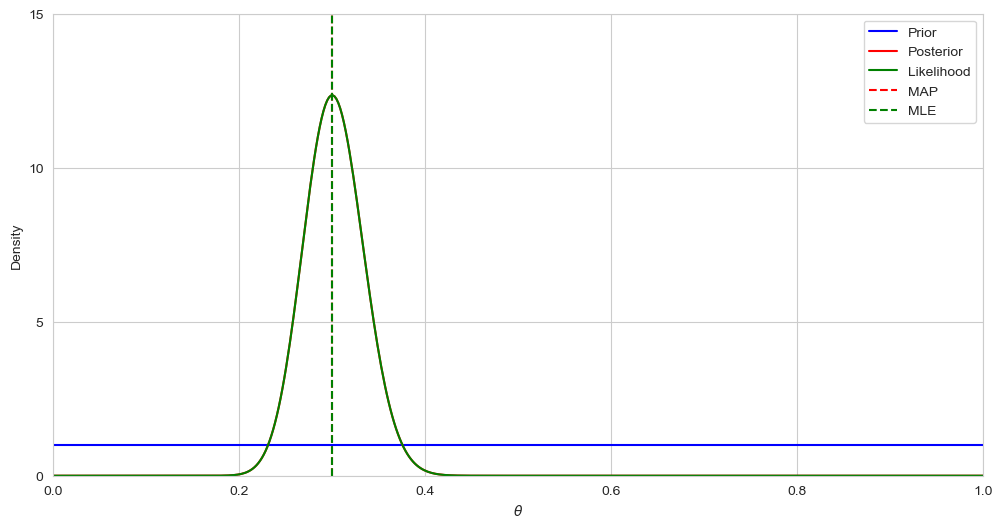

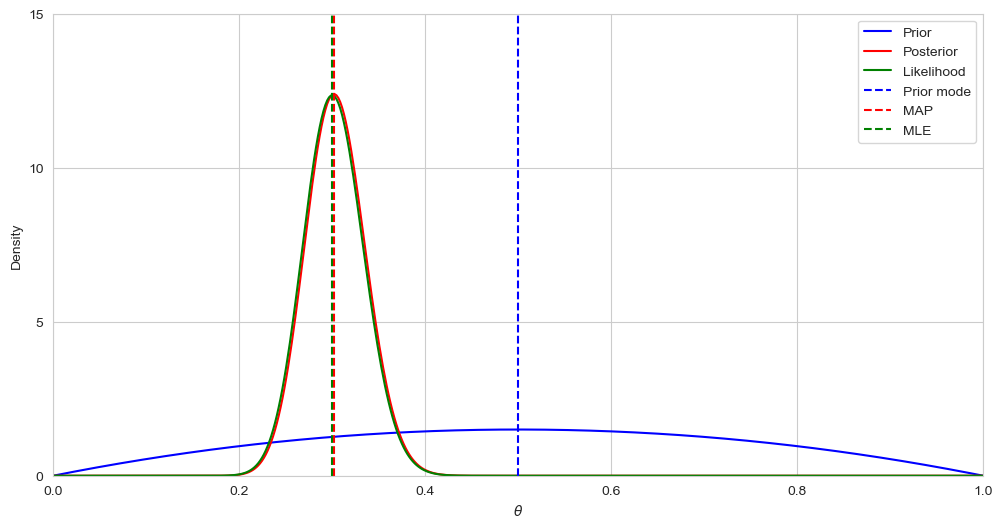

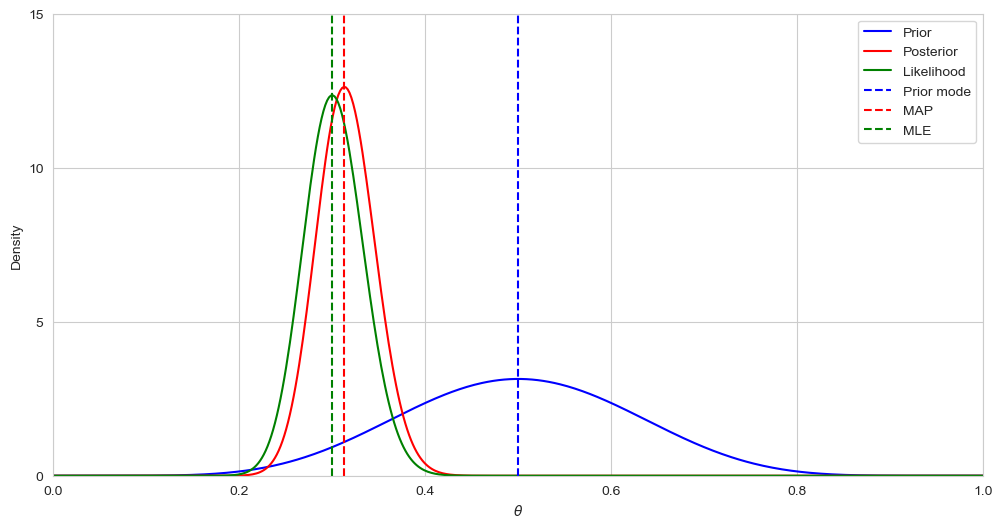

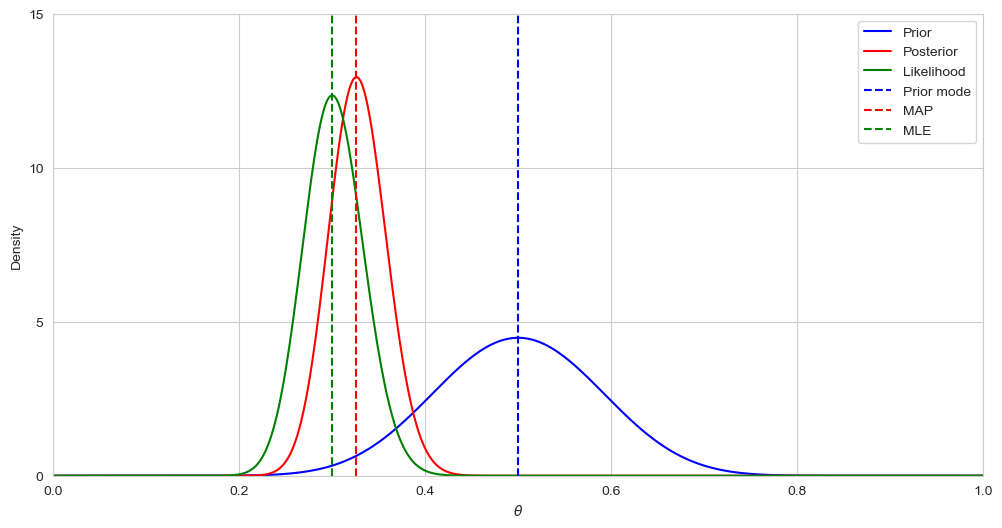

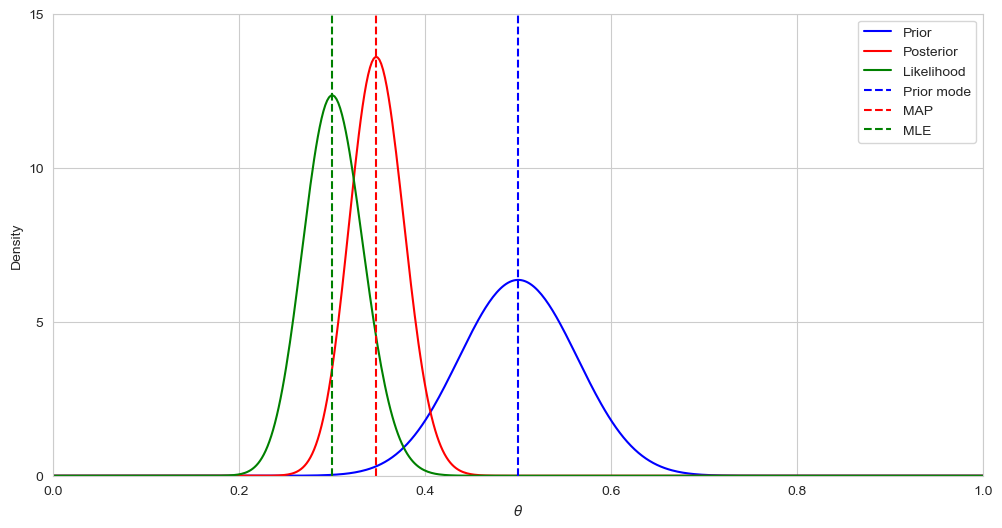

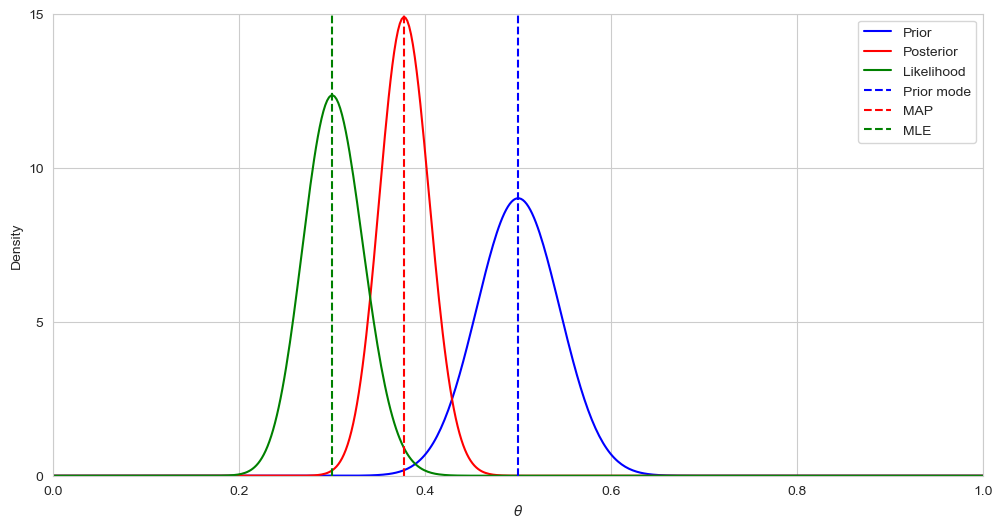

In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# number of animal samples:
n = 200

# number of rabbits in data:
s = 60

# probability of rabbits among animals:
p = s / n
# 创建二项分布对象
binom_dist = stats.binom(n, p)
# 计算二项分布均值
mu = binom_dist.mean()
# 生成数据点
theta_array = np.linspace(0, 1, 500)

# prior distribution
# assumption: 1:1 ratio
# i.e., alpha = beta in Beta(alpha, beta) distribution

alpha_arrays = [1, 2, 8, 16, 32, 64]

for alpha in alpha_arrays:

    beta = alpha
    # 先验概率
    prior = stats.beta(alpha, beta)

    # posterior distribution
    # 后验概率
    posterior = stats.beta(s + alpha, n - s + beta)

    fig, ax = plt.subplots(figsize=(12, 6))

    plt.plot(theta_array, prior.pdf(theta_array),
             label='Prior', c='b')

    plt.plot(theta_array, posterior.pdf(theta_array),
             label='Posterior', c='r')

    # factor_normalize = stats.binom(n, theta_array).pmf(s).sum()*1/500
    factor_normalize = 1 / (n + 1)
    # note: multiplication factor normalize to 
    # normalize likelihood distribution
    # 绘制似然函数
    plt.plot(theta_array,
             stats.binom(n, theta_array).pmf(s) / factor_normalize,
             label='Likelihood', c='g')

    # Prior mode
    # 绘制先验分布众数
    try:
        plt.axvline((alpha - 1) / (alpha + beta - 2),
                    c='b', linestyle='--',
                    label='Prior mode')
    except:
        pass

    # MAP
    plt.axvline((s + alpha - 1) / (n + alpha + beta - 2),
                c='r', linestyle='--',
                label='MAP')

    # MLE
    plt.axvline(mu / n,
                c='g',
                linestyle='--',
                label='MLE')

    plt.xlim([0, 1])
    plt.ylim([0, 15])
    plt.yticks([0, 5, 10, 15])
    plt.xlabel(r'$\theta$')
    plt.ylabel('Density')
    plt.legend()

a_list = np.arange(1, 64 + 1)

# 计算 MAP 和 MLE 
theta_MAP = (s + a_list - 1) / (n + 2 * a_list - 2)
theta_MLE = s / n


61
141
62
142
63
143
64
144
65
145
66
146
67
147
68
148
69
149
70
150
71
151
72
152
73
153
74
154
75
155
76
156
77
157
78
158
79
159
80
160
81
161
82
162
83
163
84
164
85
165
86
166
87
167
88
168
89
169
90
170
91
171
92
172
93
173
94
174
95
175
96
176
97
177
98
178
99
179
100
180
101
181
102
182
103
183
104
184
105
185
106
186
107
187
108
188
109
189
110
190
111
191
112
192
113
193
114
194
115
195
116
196
117
197
118
198
119
199
120
200
121
201
122
202
123
203
124
204


C:\Users\ghdong\AppData\Local\Temp\ipykernel_17792\4009529603.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


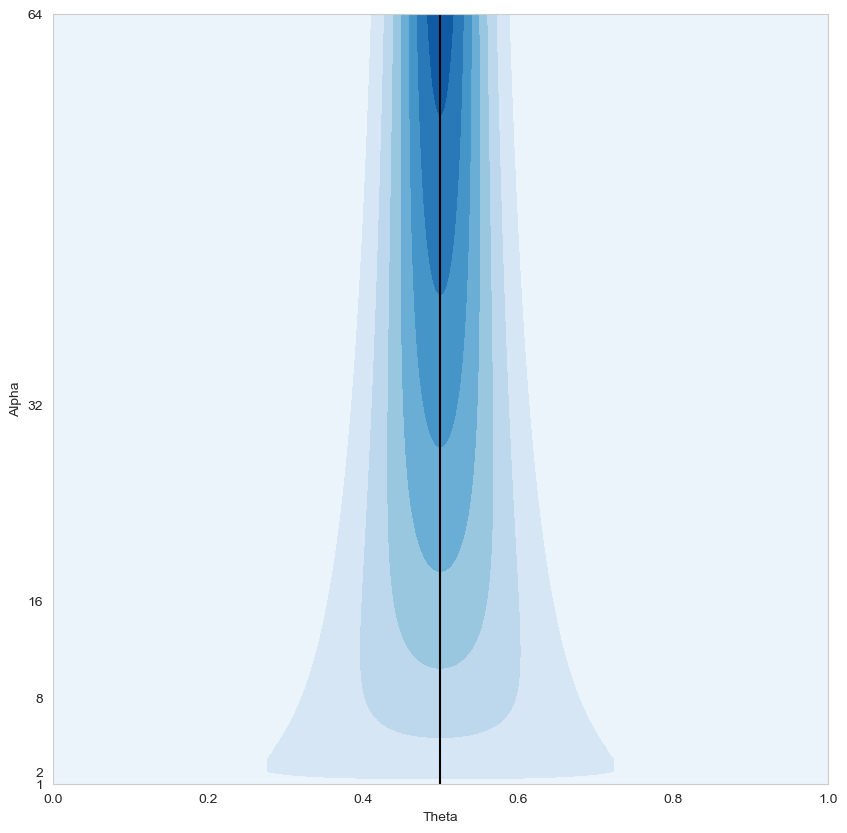

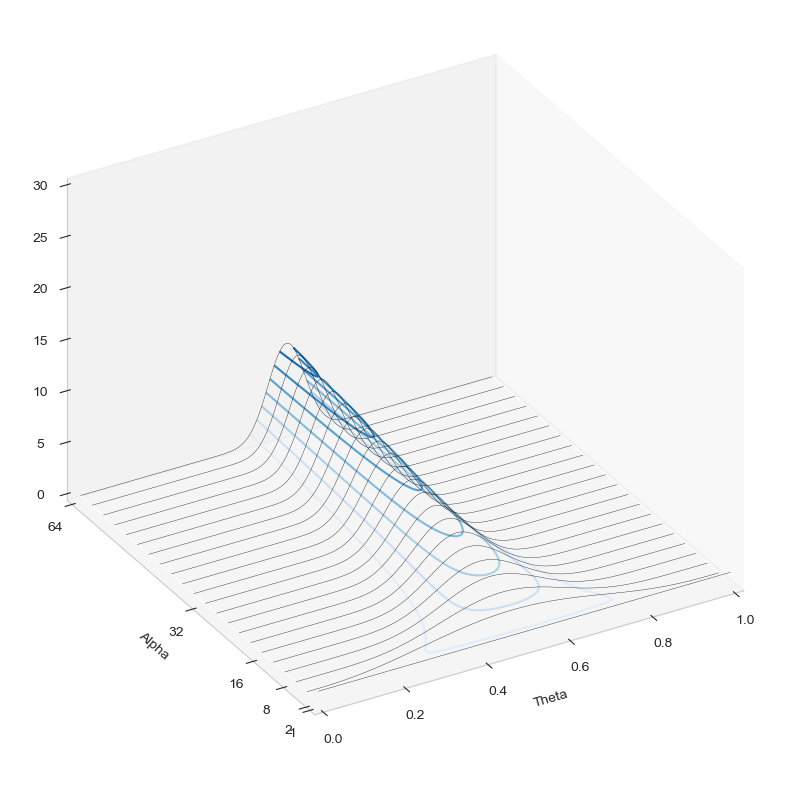

In [12]:
# 先验概率
Prior_PDF_matrix = []

for a_idx in a_list:
    print(s + a_idx)
    print(n - s + a_idx)
    print('=================')
    posterior = stats.beta(a_idx, a_idx)
    pdf_idx = posterior.pdf(theta_array)
    Prior_PDF_matrix.append(pdf_idx)

Prior_PDF_matrix = np.array(Prior_PDF_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
plt.contourf(theta_array, a_list, Prior_PDF_matrix,
             levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10),
             cmap='Blues')

# plt.plot(theta_MAP,a, color = 'k')
# plt.axvline(x = theta_MLE, color = 'k')
# prior mode
plt.axvline(x=0.5, color='k')

plt.xlabel('Theta')
plt.ylabel('Alpha')
plt.xlim(0, 1)
plt.ylim(1, a_list.max())
plt.yticks([1, 2, 8, 16, 32, 64])

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

tt, aa = np.meshgrid(theta_array, a_list)
ax.plot_wireframe(tt, aa, Prior_PDF_matrix,
                  color=[0, 0, 0],
                  linewidth=0.25,
                  rstride=3, cstride=0)

ax.contour(theta_array, a_list, Prior_PDF_matrix,
           levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10),
           cmap='Blues')

ax.set_proj_type('ortho')

plt.xlabel('Theta')
plt.ylabel('Alpha')
plt.xlim(0, 1)
plt.ylim(1, a_list.max())
plt.yticks([1, 2, 8, 16, 32, 64])

ax.set_zlim3d([0, 30])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)


61
141
62
142
63
143
64
144
65
145
66
146
67
147
68
148
69
149
70
150
71
151
72
152
73
153
74
154
75
155
76
156
77
157
78
158
79
159
80
160
81
161
82
162
83
163
84
164
85
165
86
166
87
167
88
168
89
169
90
170
91
171
92
172
93
173
94
174
95
175
96
176
97
177
98
178
99
179
100
180
101
181
102
182
103
183
104
184
105
185
106
186
107
187
108
188
109
189
110
190
111
191
112
192
113
193
114
194
115
195
116
196
117
197
118
198
119
199
120
200
121
201
122
202
123
203
124
204


C:\Users\ghdong\AppData\Local\Temp\ipykernel_17792\4255171934.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


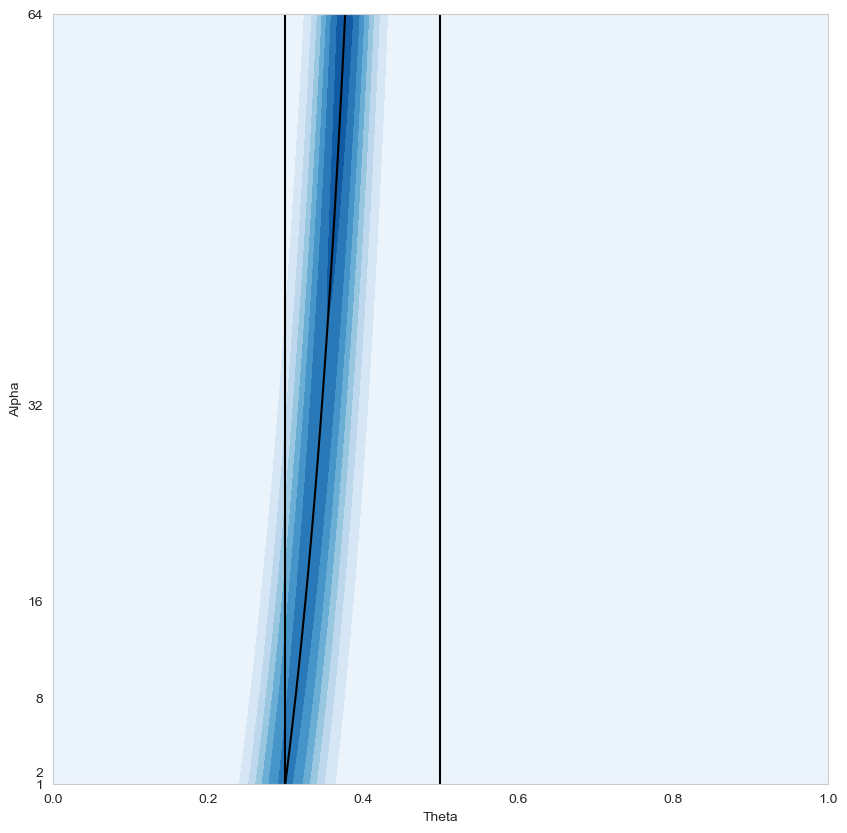

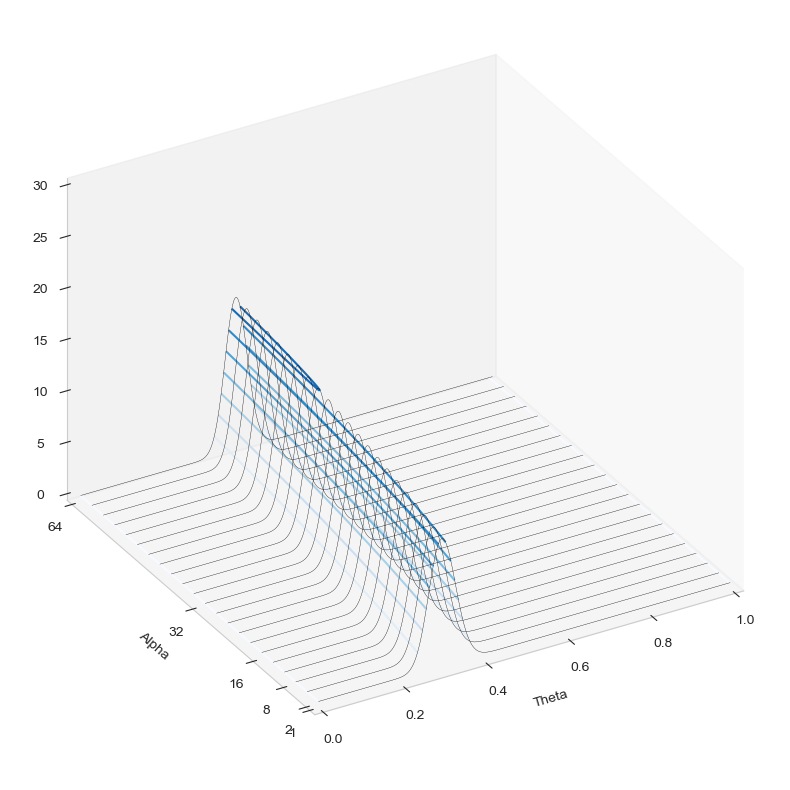

In [13]:
Prior_PDF_matrix = []

for a_idx in a_list:
    print(s + a_idx)
    print(n - s + a_idx)
    print('=================')
    posterior = stats.beta(s + a_idx, n - s + a_idx)
    pdf_idx = posterior.pdf(theta_array)
    Prior_PDF_matrix.append(pdf_idx)

Prior_PDF_matrix = np.array(Prior_PDF_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
plt.contourf(theta_array, a_list, Prior_PDF_matrix,
             levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10),
             cmap='Blues')

plt.plot(theta_MAP, a_list, color='k')
plt.axvline(x=theta_MLE, color='k')
# prior mode
plt.axvline(x=0.5, color='k')

plt.xlabel('Theta')
plt.ylabel('Alpha')
plt.xlim(0, 1)
plt.ylim(1, a_list.max())
plt.yticks([1, 2, 8, 16, 32, 64])

fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw={'projection': '3d'})

tt, aa = np.meshgrid(theta_array, a_list)
ax.plot_wireframe(tt, aa, Prior_PDF_matrix,
                  color=[0, 0, 0],
                  linewidth=0.25,
                  rstride=3, cstride=0)

ax.contour(theta_array, a_list, Prior_PDF_matrix,
           levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10),
           cmap='Blues')

ax.set_proj_type('ortho')

plt.xlabel('Theta')
plt.ylabel('Alpha')
plt.xlim(0, 1)
plt.ylim(1, a_list.max())
plt.yticks([1, 2, 8, 16, 32, 64])

ax.set_zlim3d([0, 30])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)
# plt.show()